In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, robust_scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('../data/processed/beijing.csv', index_col = 0)
df.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,Iprec,hour_x,hour_y,month_x,month_y
time,,,,,,,,,,,
2010-01-01 23:00:00,129.0,-17.0,41.0,1020.0,-5.0,0.0,0.0,0.965926,-0.258819,0.866025,0.5
2010-01-02 00:00:00,148.0,-16.0,38.0,1020.0,-4.0,0.0,0.0,1.000000,0.000000,0.866025,0.5
2010-01-02 01:00:00,159.0,-15.0,42.0,1020.0,-4.0,0.0,0.0,0.965926,0.258819,0.866025,0.5
2010-01-02 02:00:00,181.0,-11.0,63.5,1021.0,-5.0,0.0,0.0,0.866025,0.500000,0.866025,0.5
2010-01-02 03:00:00,138.0,-7.0,85.0,1022.0,-5.0,0.0,0.0,0.707107,0.707107,0.866025,0.5


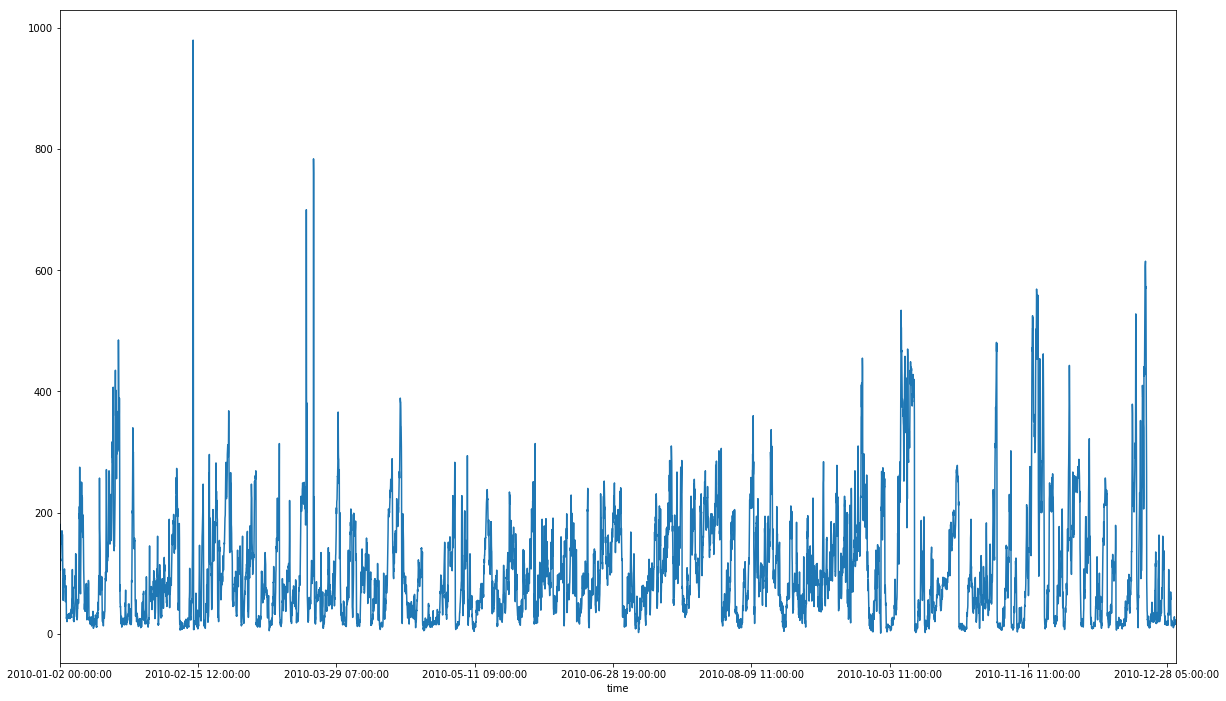

In [4]:
df['2010-01-02':'2010-12-31']['PM_US Post'].plot(figsize=(20, 12))

In [5]:
scaler = StandardScaler()

In [6]:
train_df = df[:'2014-12-31']
scaled_train_df = pd.DataFrame(scaler.fit_transform(train_df), 
                         index=train_df.index, columns=train_df.columns)
scaled_train_df.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,Iprec,hour_x,hour_y,month_x,month_y
time,,,,,,,,,,,
2010-01-01 23:00:00,0.329514,-1.300777,-0.510191,0.346923,-1.430267,-0.076106,-0.085268,1.364904,-0.365208,1.222239,0.706723
2010-01-02 00:00:00,0.535887,-1.231466,-0.625668,0.346923,-1.348140,-0.076106,-0.085268,1.413101,0.000748,1.222239,0.706723
2010-01-02 01:00:00,0.655366,-1.162155,-0.471699,0.346923,-1.348140,-0.076106,-0.085268,1.364904,0.366704,1.222239,0.706723
2010-01-02 02:00:00,0.894325,-0.884911,0.355885,0.444048,-1.430267,-0.076106,-0.085268,1.223597,0.707721,1.222239,0.706723
2010-01-02 03:00:00,0.427270,-0.607667,1.183470,0.541173,-1.430267,-0.076106,-0.085268,0.998809,1.000559,1.222239,0.706723


In [7]:
from numpy import array
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, CuDNNLSTM, TimeDistributed
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.models import Model
from keras.layers import Input
from keras import optimizers

/home/ahua/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

In [9]:
input_enc = len(df.columns)
dropout = 0.0

input_enc_layer = Input(shape=(None, input_enc))
layer = LSTM(25,
#                               stateful=False
#                               activation=enc_act[0], recurrent_activation=enc_rec_act[0],
#                               activity_regularizer=regularizers.l1(10e-100),
#                               batch_input_shape=batch_input_shape,
                               return_sequences=True,
#                               return_state=True,
                               #dropout=dropout,
                               #recurrent_dropout=dropout
                              )(input_enc_layer)

layer = LSTM(50,
#                               stateful=False
#                               activation=enc_act[0], recurrent_activation=enc_rec_act[0],
#                               activity_regularizer=regularizers.l1(10e-100),
#                               batch_input_shape=batch_input_shape,
                               return_sequences=True,
#                               return_state=True,
                               #dropout=dropout,
                               #recurrent_dropout=dropout
                              )(input_enc_layer)

layer = LSTM(25,
#                               stateful=False
#                               activation=enc_act[0], recurrent_activation=enc_rec_act[0],
#                               activity_regularizer=regularizers.l1(10e-100),
#                               batch_input_shape=batch_input_shape,
                               return_sequences=False,
#                               return_state=True,
                               #dropout=dropout,
                               #recurrent_dropout=dropout
                              )(layer)


layer = Dense(1,activation='linear')(layer)


#output_layer = TimeDistributed(Dense(input_enc, activation='linear'))(layer)

ops = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model = Model(inputs=input_enc_layer, outputs=layer)
model.compile(optimizer=ops,
              loss='mse',
              metrics=['mse'])

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, 11)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, None, 50)          12400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 20,026
Trainable params: 20,026
Non-trainable params: 0
_________________________________________________________________


In [11]:
def lookback_window(input_df, window_size, step=1):
    #input_array: 2D np array of size (num_timesteps, window_size)
    #window_size: int, size of the window to slice array
    #step: int, number of timestep to increment window by
    #return: a 3D array of size (batch_size, window_size, num_features) 

    samples = input_df.shape[0] - window_size + step
    sensors = input_df.shape[1]
    
    array = np.empty(shape=(int(samples/step), window_size, sensors))
    index = pd.DataFrame(data=np.empty(int(samples/step)))
                     
    for s in range(int(samples/step)):
        array[s, :, :] = input_df.iloc[s*step : s*step + window_size, :]
        index.iloc[s] = input_df.index[s*step + window_size - 1]
        
    return index, array

In [12]:
val_split = 0.2
window_size = 24
step = 1

indices, input_train_enc = lookback_window(scaled_train_df, window_size, step)

train_size_enc = int(input_train_enc.shape[0]*(1 - val_split))
val_data_enc    = input_train_enc[train_size_enc:-1, :, :]
input_train_enc = input_train_enc[0:train_size_enc, :, :]

history = model.fit(input_train_enc[:,0:-1,:], input_train_enc[:,-1,0],
                    epochs=10,
                    batch_size=256,
                    shuffle=False,
                    validation_data=(val_data_enc[:,0:-1,:], val_data_enc[:,-1,0]),
                    verbose=1).history

model.save('weights2.h5')

Train on 33347 samples, validate on 8336 samples
Epoch 1/10
33347/33347 [==============================] - 9s 259us/step - loss: 0.4676 - mean_squared_error: 0.4676 - val_loss: 0.2409 - val_mean_squared_error: 0.2409
Epoch 2/10
33347/33347 [==============================] - 10s 304us/step - loss: 0.2182 - mean_squared_error: 0.2182 - val_loss: 0.1374 - val_mean_squared_error: 0.1374
Epoch 3/10
33347/33347 [==============================] - 10s 314us/step - loss: 0.1488 - mean_squared_error: 0.1488 - val_loss: 0.1034 - val_mean_squared_error: 0.1034
Epoch 4/10
33347/33347 [==============================] - 12s 357us/step - loss: 0.1133 - mean_squared_error: 0.1133 - val_loss: 0.0805 - val_mean_squared_error: 0.0805
Epoch 5/10
33347/33347 [==============================] - 11s 321us/step - loss: 0.0973 - mean_squared_error: 0.0973 - val_loss: 0.1030 - val_mean_squared_error: 0.1030
Epoch 6/10
33347/33347 [==============================] - 12s 368us/step - loss: 0.0965 - mean_squared_erro

In [13]:
from keras.models import load_model

model = load_model('weights2.h5')
val_split = 0.2
window_size = 24
step = 1

In [14]:
window = 24
p = 0.1
rg = 1


train_index, batches = lookback_window(scaled_train_df, window_size, step)
train_prediction = model.predict(batches[:,0:-1,:])

In [15]:
train = scaled_train_df.loc[train_index.iloc[:,0],'PM_US Post']  #these are the valid train indices according to the mask
train_error = np.absolute(train.values - train_prediction.flatten())**2
train_error = pd.DataFrame(data=train_error,\
                           index=train.index)
train = pd.Series(data=train_error.sum(axis=1))
train_mean = train.rolling(window).mean().dropna()
train_std  = train.rolling(window).std().dropna()

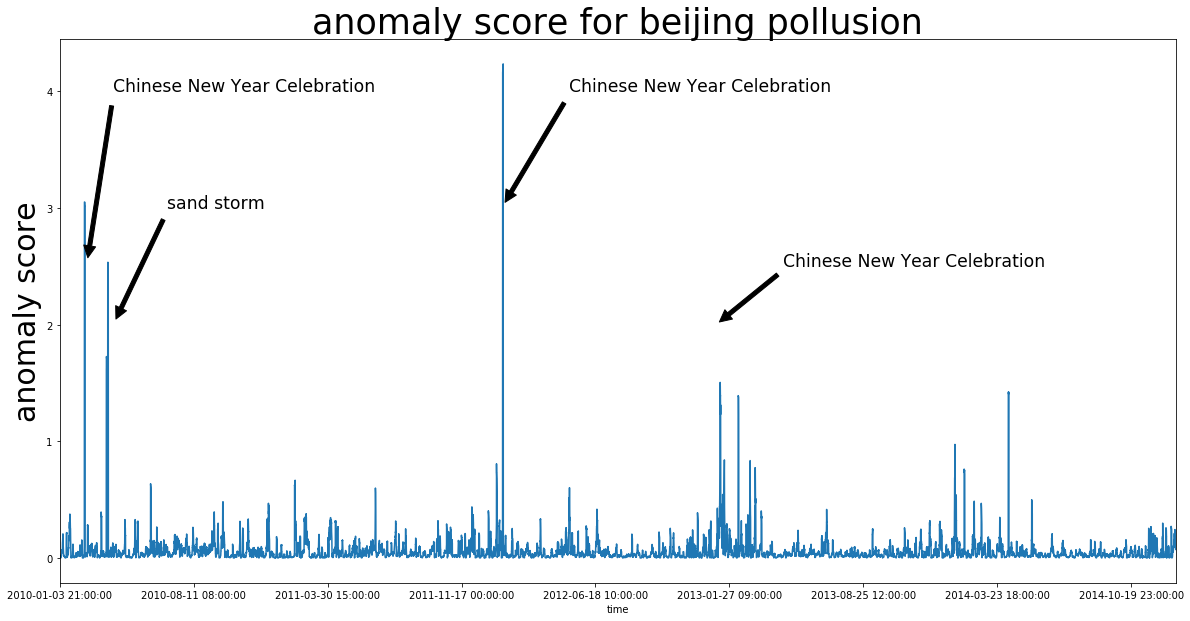

In [16]:
ax = train_mean.plot(figsize=(20, 10))
ax.set_title("anomaly score for beijing pollution", fontsize=35)
ax.set_ylabel("anomaly score", fontsize=30)
ax.annotate('Chinese New Year Celebration', xy=(16500, 3), xytext=(19000, 4),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 'xx-large')
ax.annotate('sand storm', xy=(2000, 2), xytext=(4000, 3),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 'xx-large')
ax.annotate('Chinese New Year Celebration', xy=(1000, 2.5), xytext=(2000, 4),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 'xx-large')
ax.annotate('Chinese New Year Celebration', xy=(24500, 2), xytext=(27000, 2.5),
            arrowprops=dict(facecolor='black', shrink=0.05), size = 'xx-large')
plt.savefig('../images/pollution_train.png')

In [17]:
set([d.split()[0] for d in train_mean.nlargest(50).index])

{'2010-02-14', '2010-02-15', '2010-03-22', '2010-03-23', '2012-01-23'}

In [18]:
test_df = df['2014-12-31':]
scaled_test_df = pd.DataFrame(scaler.transform(test_df), 
                         index=test_df.index, columns=test_df.columns)
scaled_test_df.head()

,PM_US Post,DEWP,HUMI,PRES,TEMP,precipitation,Iprec,hour_x,hour_y,month_x,month_y
time,,,,,,,,,,,
2014-12-31 00:00:00,-0.952171,-1.439399,-1.164560,1.026798,-1.101759,-0.076106,-0.085268,1.413101,0.000748,1.411057,-0.002841
2014-12-31 01:00:00,-0.854416,-1.370088,-1.087575,1.123923,-1.101759,-0.076106,-0.085268,1.364904,0.366704,1.411057,-0.002841
2014-12-31 02:00:00,-0.973895,-1.300777,-1.010591,1.123923,-1.101759,-0.076106,-0.085268,1.223597,0.707721,1.411057,-0.002841
2014-12-31 03:00:00,-0.984756,-1.300777,-1.010591,1.221048,-1.101759,-0.076106,-0.085268,0.998809,1.000559,1.411057,-0.002841
2014-12-31 04:00:00,-0.973895,-1.439399,-1.126068,1.318173,-1.183886,-0.076106,-0.085268,0.705860,1.225262,1.411057,-0.002841


In [19]:
test_index, batches = lookback_window(scaled_test_df, window_size, step)
test_prediction = model.predict(batches[:,0:-1,:])

test = scaled_test_df.loc[test_index.iloc[:,0],'PM_US Post']  #these are the valid test indices according to the mask
test_error = np.absolute(test.values - test_prediction.flatten())**2
test_error = pd.DataFrame(data=test_error,\
                           index=test.index)
test = pd.Series(data=test_error.sum(axis=1))
test_mean = test.rolling(window).mean().dropna()
test_std  = test.rolling(window).std().dropna()

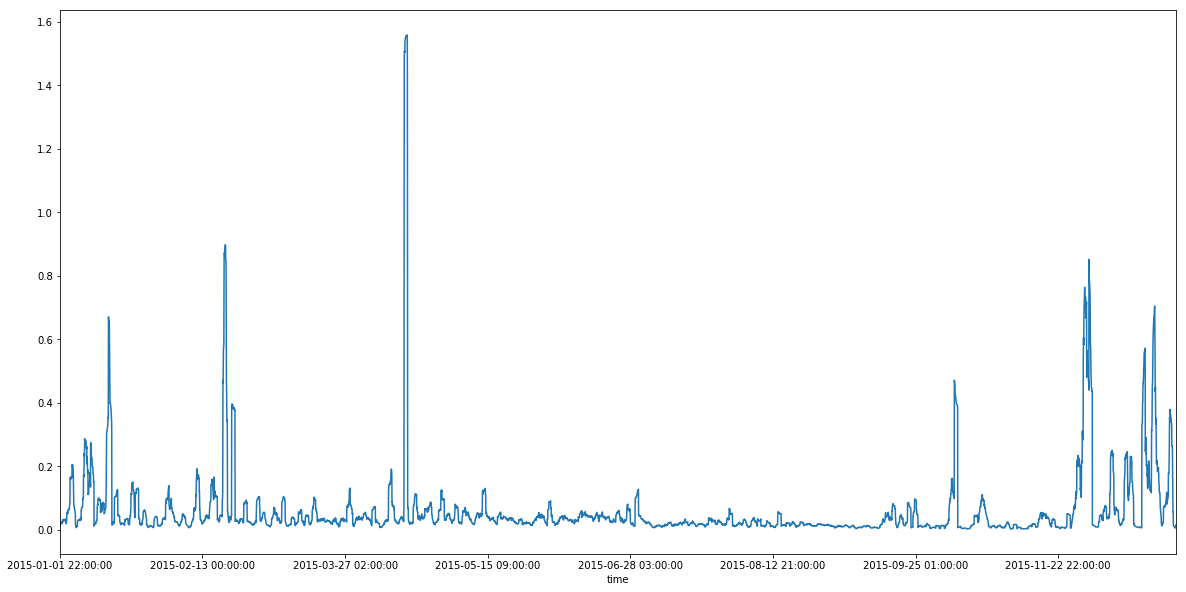

In [20]:
test_mean.plot(figsize=(20,10))

In [24]:
test_mean.nlargest(10)

time
2015-04-16 15:00:00    1.627920
2015-04-16 14:00:00    1.627829
2015-04-16 13:00:00    1.627287
2015-04-16 16:00:00    1.627164
2015-04-16 12:00:00    1.627012
2015-04-16 11:00:00    1.626304
2015-04-16 17:00:00    1.626202
2015-04-16 19:00:00    1.625428
2015-04-16 21:00:00    1.625368
2015-04-16 18:00:00    1.625331
dtype: float64

On 2015-04-16, a massive [sandstorm](https://www.huffpost.com/entry/beijing-sandstorm_n_7081716) again hit Beijing